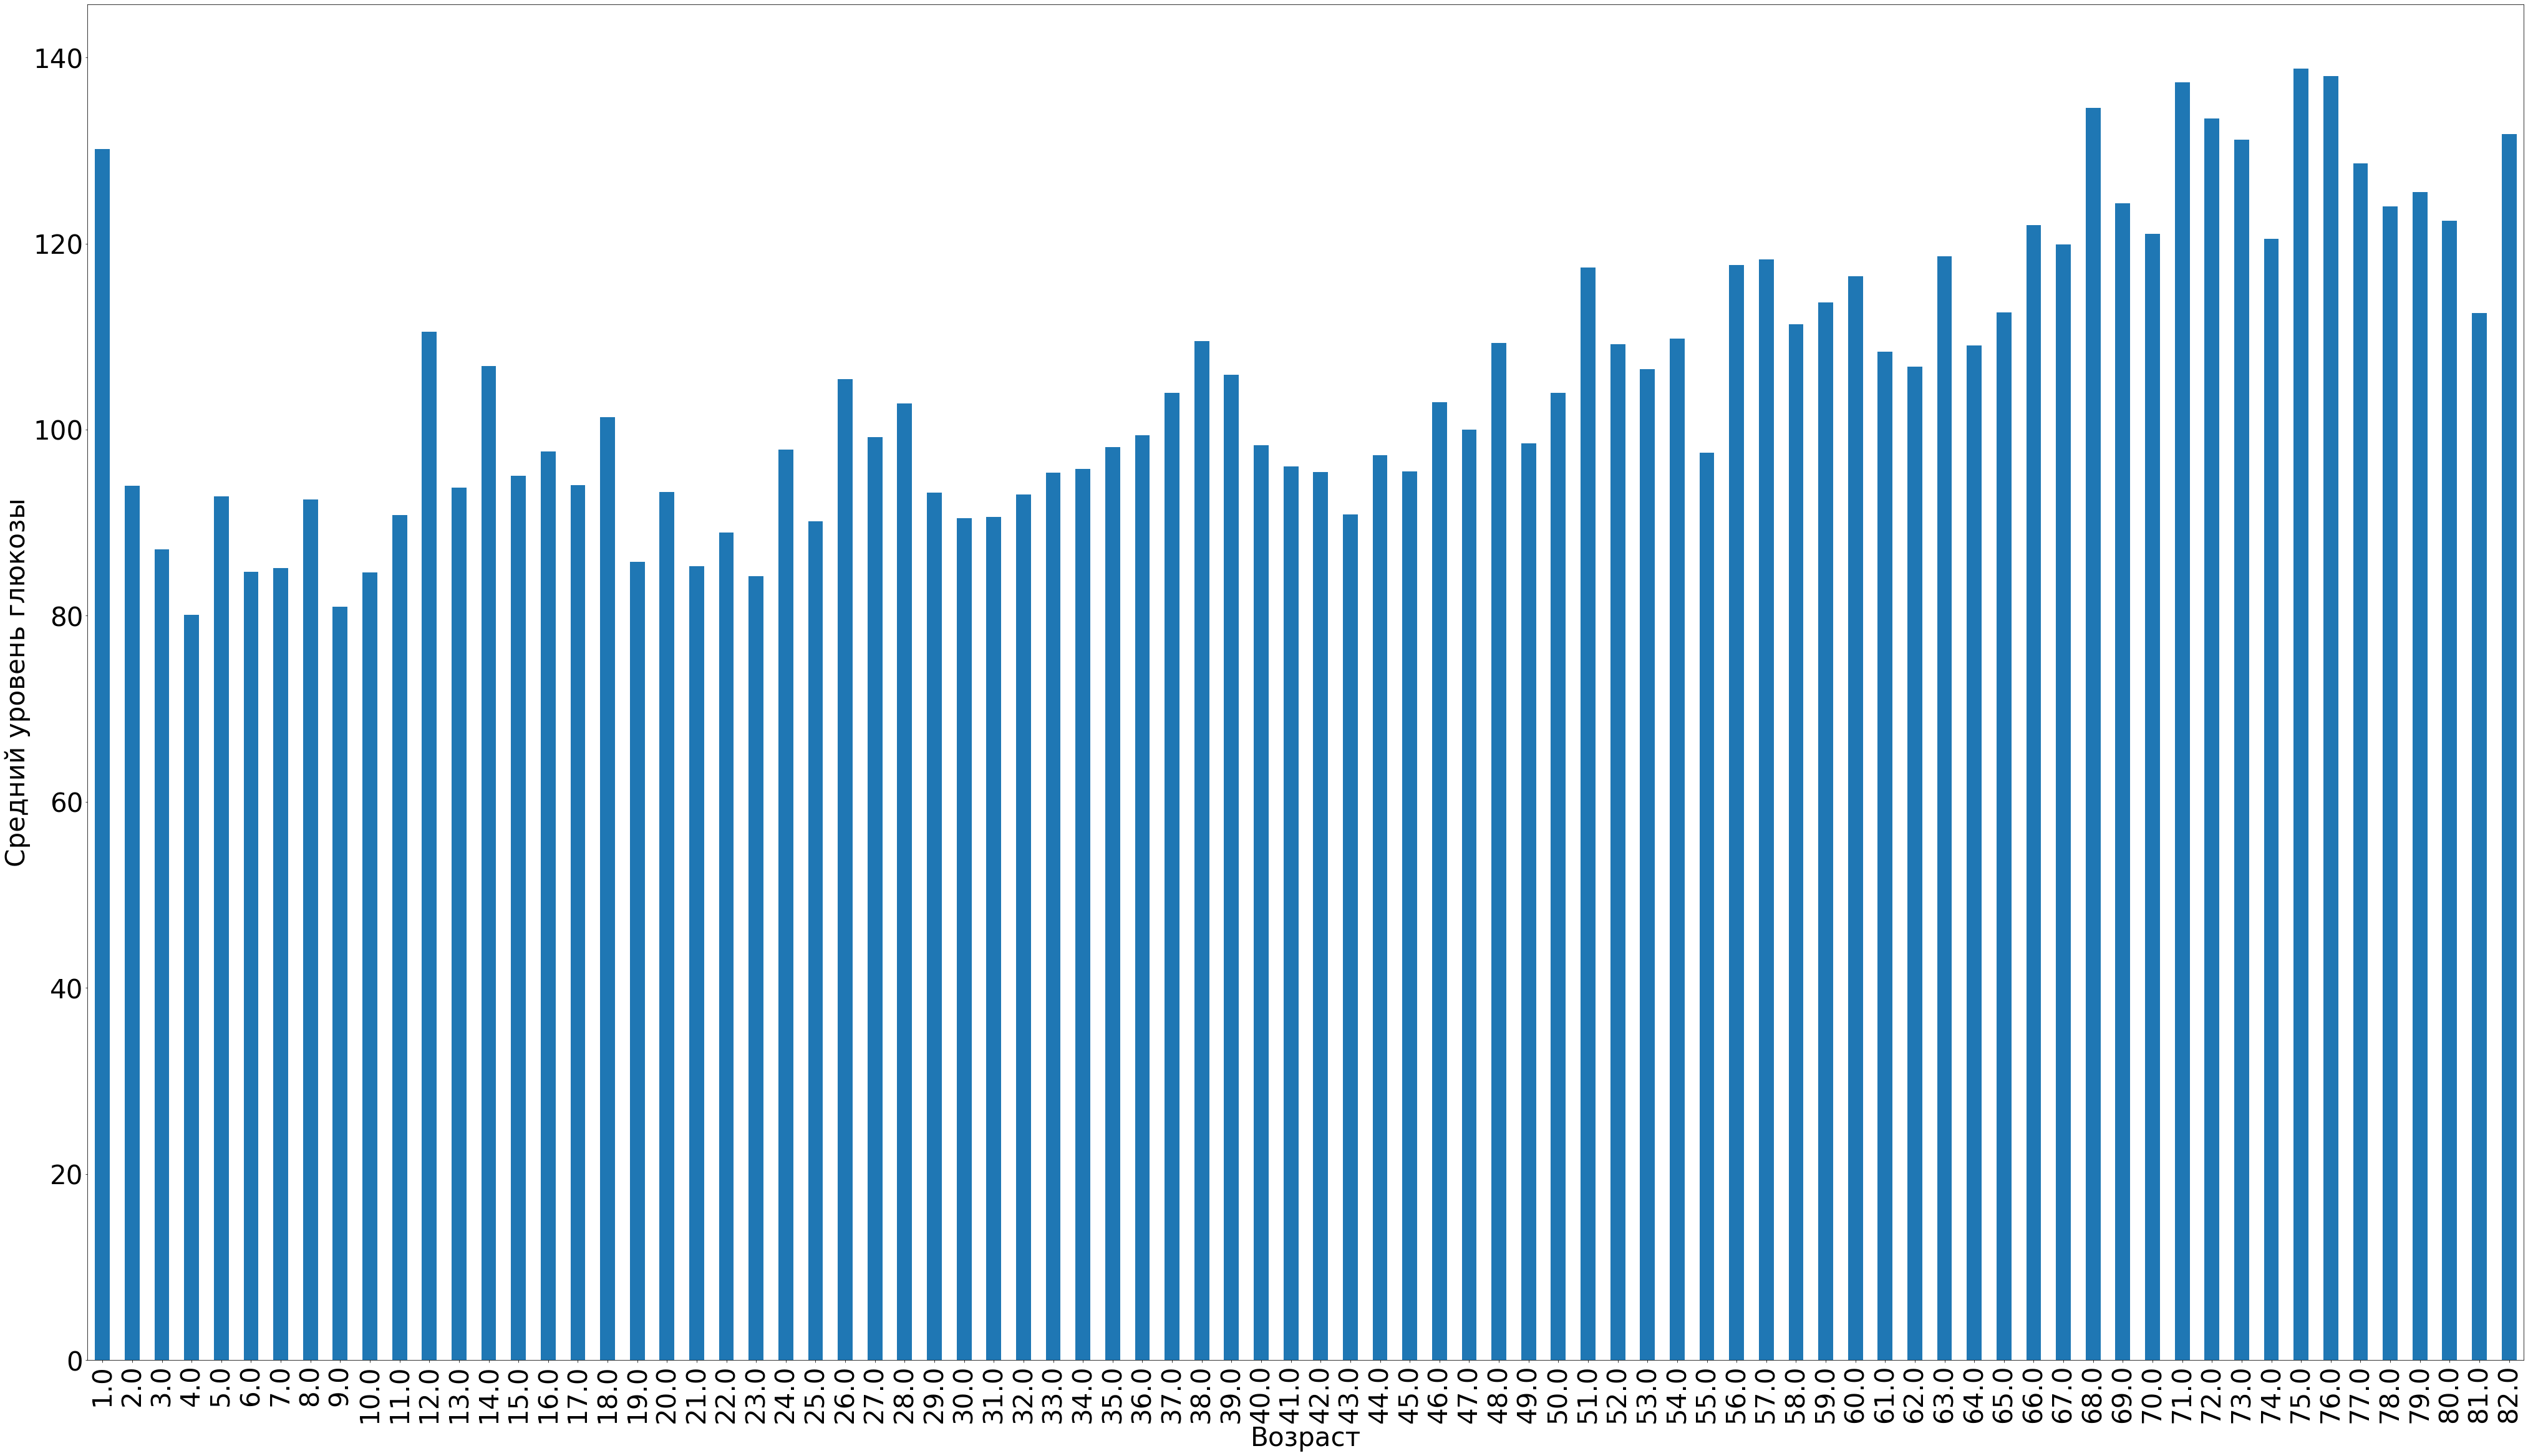

In [12]:
import pandas as pd
import numpy as np
import seaborn as sns
url = 'https://drive.google.com/file/d/1He5GI5_Gd8uXYfeETLBISQ5BszX0o4pU/view?usp=sharing'
url = 'https://drive.google.com/uc?id=' + url.split('/')[-2]
data = pd.read_csv(url,names=['index','gender', 'age', 'hypertension', 'heart_disease',
       'ever_married', 'work_type', 'Residence_type', 'avg_glucose_level',
       'bmi', 'smoking_status', 'stroke'])
data = data.drop('index',axis=1)
data = data.dropna(axis=0)
data = data.drop_duplicates()
data = data.reset_index(drop=True)
data = data.drop([0, 1])
data = data.reset_index(drop=True)
for col in list(data.columns):
    if ('age' in col or 'hypertension' in col or 'heart_disease' in col or 'avg_glucose_level' in col or 'bmi' in col or 'stroke' in col):
        data[col] = data[col].astype(float)
import matplotlib.pyplot as plt
data = data.reset_index(drop=True)
for f in range(len(data)):
    g1 = data['age'][f]
    if g1 // 1 != g1:
        data = data.drop([f])
        continue
data = data.reset_index(drop=True)
data = data.sort_values(by='age', ascending=False)
data = data.reset_index(drop=True)
g2 = 0
frame = pd.DataFrame({'age': [],'avg_glucose_level': []})
for f in range(len(data)):
    g3 = data['age'][f]
    if g3 != g2:
        data1 = data.loc[data['age'] == g3]
        j = data1["avg_glucose_level"].mean()
        #print(j)
        g2 = g3
        frameone = pd.DataFrame({'age': [g3],'avg_glucose_level': [j]})
        frame = pd.concat([frame, frameone])
        continue
frame = frame.reset_index(drop=True)
frame = frame.sort_values(by='age', ascending=True)
frame = frame.reset_index(drop=True)
from pylab import rcParams
rcParams['figure.figsize'] = 70,40
bm_price_series = frame.set_index('age')['avg_glucose_level'] 
bm_price_series.plot.bar(x = 'age', y= 'avg_glucose_level', fontsize=42)
plt.ylabel('Средний уровень глюкозы', fontsize=42)
plt.xlabel('Возраст', fontsize=42)
plt.show()